#DA24C026 - Assignment 6

**Task 1**

In [4]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [50]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, classification_report

In [2]:
from datasets import load_dataset
dataset = load_dataset("qanastek/MASSIVE", split='train')
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


MASSIVE.py:   0%|          | 0.00/32.3k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

The repository for qanastek/MASSIVE contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/qanastek/MASSIVE.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['id', 'locale', 'partition', 'scenario', 'intent', 'utt', 'annot_utt', 'tokens', 'ner_tags', 'worker_id', 'slot_method', 'judgments'],
    num_rows: 587214
})


In [3]:
df=pd.DataFrame(dataset)

In [4]:
df.head()

,id,locale,partition,scenario,intent,utt,annot_utt,tokens,ner_tags,worker_id,slot_method,judgments
0,1,mn-MN,train,9,55,тавдахад есөн цагт намайг сэрээгээрэй,[date : тавдахад] [time : есөн цагт] намайг сэ...,"[тавдахад, есөн, цагт, намайг, сэрээгээрэй]","[7, 60, 16, 0, 0]",16,"{'slot': ['time', 'date'], 'method': ['transla...","{'worker_id': ['5', '4', '2'], 'intent_score':..."
1,2,mn-MN,train,9,55,одооноос хоёр цагийн дараа сэрүүлэг тавь,[time : одооноос хоёр цагийн дараа] сэрүүлэг тавь,"[одооноос, хоёр, цагийн, дараа, сэрүүлэг, тавь]","[60, 16, 16, 16, 0, 0]",16,"{'slot': ['time'], 'method': ['translation']}","{'worker_id': ['4', '5', '2'], 'intent_score':..."
2,4,mn-MN,train,14,7,олли чимээгүй,олли чимээгүй,"[олли, чимээгүй]","[0, 0]",16,"{'slot': [], 'method': []}","{'worker_id': ['10', '2', '4'], 'intent_score'..."
3,5,mn-MN,train,14,7,зогс,зогс,[зогс],[0],2,"{'slot': [], 'method': []}","{'worker_id': ['4', '26', '43'], 'intent_score..."
4,6,mn-MN,train,14,7,olly арван секунд түр зогсоо,olly [time : арван секунд] түр зогсоо,"[olly, арван, секунд, түр, зогсоо]","[0, 60, 16, 0, 0]",16,"{'slot': ['time'], 'method': ['translation']}","{'worker_id': ['16', '5', '43'], 'intent_score..."


Retaining data with just 27 required languages.

In [12]:
locales=['af-ZA', 'da-DK', 'de-DE', 'en-US', 'es-ES', 'fr-FR', 'fi-FI', 'hu-HU', 'is-IS', 'it-IT', 'jv-ID', 'lv-LV', 'ms-MY', 'nb-NO', 'nl-NL', 'pl-PL', 'pt-PT',
'ro-RO', 'ru-RU', 'sl-SL', 'sv-SE', 'sq-AL', 'sw-KE', 'tl-PH', 'tr-TR', 'vi-VN', 'cy-GB' ]

df_tarin = df.loc[(df['locale'].isin(locales))]
df_train = df_tarin[['locale','utt','tokens']]

In [13]:
df_train.head()

,locale,utt,tokens
11514,af-ZA,maak my wakker nege-uur v. m. op vrydag,"[maak, my, wakker, nege-uur, v., m., op, vrydag]"
11515,af-ZA,stel 'n alarm vir twee ure van nou af,"[stel, 'n, alarm, vir, twee, ure, van, nou, af]"
11516,af-ZA,janneman stilte,"[janneman, stilte]"
11517,af-ZA,stop,[stop]
11518,af-ZA,janneman onderbreek dit vir tien sekondes,"[janneman, onderbreek, dit, vir, tien, sekondes]"


In [7]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.3 MB/s eta 0:00:00


Creating files for 27 languages each

In [15]:
import unidecode
for loc in locales:
     utters = df_train[df_train['loc'] == loc]['utt']
     utters = utters.apply(lambda x: unidecode.unidecode(x))
     with open(f"{loc}.txt", "w", encoding="utf-8") as file:
         file.write("\n".join(utters))

**Task 2**

Creating test and validation sets

In [9]:
dataset_test = load_dataset("qanastek/MASSIVE", split='test', trust_remote_code=True)
df_test=pd.DataFrame(dataset_test)

In [10]:
df_test=df_test.loc[(df_test['locale'].isin(locales))]

In [11]:
df_test=df_test[['locale','utt','tokens']]

In [18]:
dataset_test = load_dataset("qanastek/MASSIVE", split='validation', trust_remote_code=True)
df_val=pd.DataFrame(dataset_test)

df_val=df_val.loc[(df_val['locale'].isin(locales))]
df_val=df_val[['locale','utt','tokens']]

In [19]:
y_train=df_tarin['locale']
x_train=df_tarin.drop('locale', axis= 1)
y_test=df_test['locale']
x_test=df_test.drop('locale', axis= 1)
y_val=df_val['locale']
x_val=df_val.drop('locale', axis= 1)

Conversion of text data to vectors

In [20]:
vectorizer = TfidfVectorizer()
x_vect = vectorizer.fit_transform(x_train['utt'])

In [21]:
x_test_vect= vectorizer.transform(x_test['utt'])
x_val_vect=  vectorizer.transform(x_val['utt'])

Multinomial Naive Bayes Training

In [22]:
clf = MultinomialNB()
clf.fit(x_vect, y_train)

MultinomialNB()

In [23]:
y_hat=clf.predict(x_test_vect)

In [24]:
matrix = confusion_matrix(y_test, y_hat)

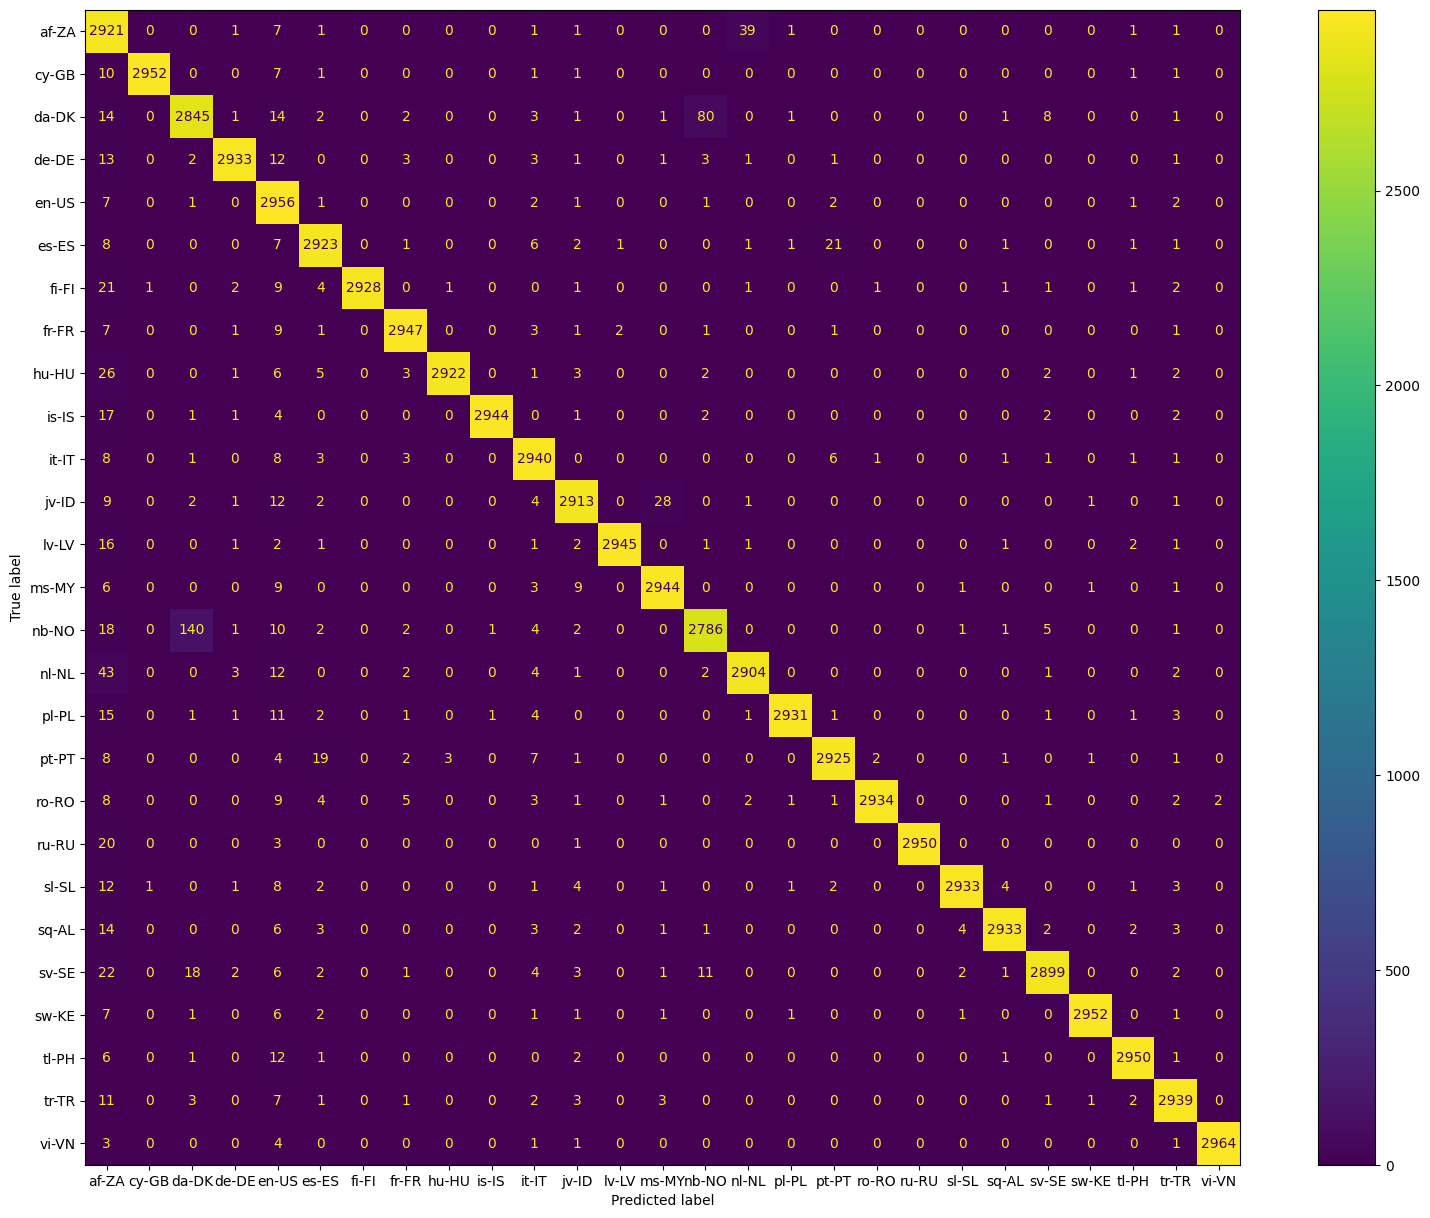

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(20, 15))
disp.plot(ax=ax, cmap=plt.cm.viridis)

In [33]:
print(accuracy_score(y_hat, y_test))

0.98399711076241


Cross Validating for different hyperparameters

In [36]:
best_alpha = None
best_val_accuracy = 0
best_classifier = None

alpha_vals=[0,1,2,3,4,5,6,7,8,9,10]
for alpha in alpha_vals:

    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(x_vect, y_train)

    # Evaluate on the validation set
    y_val_pred = nb_classifier.predict(x_val_vect)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    print(f"Validation Accuracy for alpha={alpha}: {val_accuracy}")

    # Keep track of the best alpha and corresponding model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_alpha = alpha
        best_classifier = nb_classifier

print(f"\nBest alpha found: {best_alpha} with validation accuracy: {best_val_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Validation Accuracy for alpha=0: 0.9428139403545208
Validation Accuracy for alpha=1: 0.9842050609389518
Validation Accuracy for alpha=2: 0.9832030751853673
Validation Accuracy for alpha=3: 0.9823103969685376
Validation Accuracy for alpha=4: 0.981745641361972
Validation Accuracy for alpha=5: 0.9811626678326137
Validation Accuracy for alpha=6: 0.9805432584576707
Validation Accuracy for alpha=7: 0.9800695924650671
Validation Accuracy for alpha=8: 0.9795594906268787
Validation Accuracy for alpha=9: 0.9794137472445392
Validation Accuracy for alpha=10: 0.9790493887886903

Best alpha found: 1 with validation accuracy: 0.9842050609389518


Testing through best classifier

In [39]:
y_test_pred = nb_classifier.predict(x_test_vect)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [40]:
print(test_accuracy)

0.9785797902812026


Reporting performance metrics on validation and test sets

In [42]:
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred, target_names=locales))
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=locales))
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=locales)
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Validation Set Performance:
              precision    recall  f1-score   support

       af-ZA       0.90      0.97      0.93      2033
       da-DK       1.00      0.99      0.99      2033
       de-DE       0.93      0.95      0.94      2033
       en-US       0.99      0.98      0.98      2033
       es-ES       0.94      0.99      0.96      2033
       fr-FR       0.97      0.97      0.97      2033
       fi-FI       1.00      0.98      0.99      2033
       hu-HU       0.98      0.99      0.98      2033
       is-IS       1.00      0.97      0.99      2033
       it-IT       1.00      0.99      0.99      2033
       jv-ID       0.98      0.99      0.98      2033
       lv-LV       0.98      0.98      0.98      2033
       ms-MY       1.00      0.99      0.99      2033
       nb-NO       0.98      0.99      0.98      2033
       nl-NL       0.96      0.92      0.94      2033
       pl-PL       0.97      0.96      0.97      2033
       pt-PT       0.98      0.98      0.98      2033

**Task 3**

Mapping languages to continents

In [43]:
locale_continent = {'af-ZA': 'Africa', 'da-DK': 'Europe', 'de-DE': 'Europe', 'en-US': 'North America',
    'es-ES': 'Europe', 'fr-FR': 'Europe', 'fi-FI': 'Europe', 'hu-HU': 'Europe', 'is-IS': 'Europe',
    'it-IT': 'Europe', 'jv-ID': 'Asia', 'lv-LV': 'Europe', 'ms-MY': 'Asia', 'nb-NO': 'Europe',
    'nl-NL': 'Europe', 'pl-PL': 'Europe', 'pt-PT': 'Europe', 'ro-RO': 'Europe', 'ru-RU': 'Europe',
    'sl-SL': 'Europe', 'sv-SE': 'Europe', 'sq-AL': 'Europe', 'sw-KE': 'Africa', 'tl-PH': 'Asia',
    'tr-TR': 'Asia', 'vi-VN': 'Asia', 'cy-GB': 'Europe'}


df_train['continent'] = df_train['locale'].map(locale_continent)
df_val['continent'] = df_val['locale'].map(locale_continent)
df_test['continent'] = df_test['locale'].map(locale_continent)

<ipython-input-43-457c7fb0a19f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['continent'] = df_train['locale'].map(locale_to_continent)


Conversion of text to vectors

In [46]:
label_encoder = LabelEncoder()
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(df_train['utt'])
y_train = label_encoder.fit_transform(df_train['continent'])
y_val = label_encoder.transform(df_val['continent'])
X_val = vectorizer.transform(df_val['utt'])
X_test = vectorizer.transform(df_test['utt'])
y_test = df_test['continent']

In [51]:
class RDA:
    def __init__(self, lambda_):
        self.lambda_ = lambda_
        self.lda = LDA()
        self.qda = QDA()

    def fit(self, X, y):
        self.lda.fit(X, y)
        self.qda.fit(X, y)

    def predict(self, X):
        lda_prob = self.lda.predict_prob(X)
        qda_prob = self.qda.predict_prob(X)

        prob = (1 - self.lambda_) * lda_prob + self.lambda_ * qda_prob
        return np.argmax(prob, axis=1)

    def predict_prob(self, X):
        lda_probab = self.lda.predict_prob(X)
        qda_probab = self.qda.predict_prob(X)
        return (1 - self.lambda_param) * lda_probab + self.lambda_ * qda_probab


In [52]:
svd = TruncatedSVD(n_components=500)  # Number of components to keep which in this case is chosen to be 500

X_train_svd = svd.fit_transform(X_train)
X_val_svd = svd.transform(X_val)

for lambda_ in [0.0, 0.25, 0.5, 0.75, 1.0]:
    print(f"\nTraining RDA model with lambda={lambda_}")

    rda_model = RDA(lambda_=lambda_)

    rda_model.fit(X_train_svd, y_train)

    y_val_pred = rda_model.predict(X_val_svd)
    val_accuracy = accuracy_score(y_val, y_val_pred)


    print(f"Validation Accuracy: {val_accuracy}")
    print(classification_report(y_val, y_val_pred, target_names=df_val['continent'].unique()))



Training RDA model with lambda=0.0
Validation Accuracy: 0.9413565065311253
               precision    recall  f1-score   support

       Africa       0.97      0.80      0.87      4066
       Europe       1.00      0.82      0.90     10165
         Asia       0.93      1.00      0.96     38627
North America       0.96      0.82      0.88      2033

     accuracy                           0.94     54891
    macro avg       0.96      0.86      0.90     54891
 weighted avg       0.94      0.94      0.94     54891


Training RDA model with lambda=0.25
Validation Accuracy: 0.9445264250970105
               precision    recall  f1-score   support

       Africa       0.97      0.81      0.88      4066
       Europe       1.00      0.83      0.91     10165
         Asia       0.93      1.00      0.96     38627
North America       0.96      0.82      0.89      2033

     accuracy                           0.94     54891
    macro avg       0.96      0.86      0.91     54891
 weighted avg    